In [1]:
import pandas as pd
## test

In [2]:
# Import each CSV as a separate variable
dual_mixed_mean = pd.read_csv('results/dual_mixed_mean.csv', index_col=0)
dual_mixed_sem = pd.read_csv('results/dual_mixed_sem.csv', index_col=0)
dual_random_mean = pd.read_csv('results/dual_random_mean.csv', index_col=0)
dual_random_sem = pd.read_csv('results/dual_random_sem.csv', index_col=0)
dual_sequential_mean = pd.read_csv('results/dual_sequential_mean.csv', index_col=0)
dual_sequential_sem = pd.read_csv('results/dual_sequential_sem.csv', index_col=0)

linear_last_dual_mixed_mean = pd.read_csv('results/linear_last_dual_mixed_mean.csv', index_col=0)
linear_last_dual_mixed_sem = pd.read_csv('results/linear_last_dual_mixed_sem.csv', index_col=0)
linear_last_dual_random_mean = pd.read_csv('results/linear_last_dual_random_mean.csv', index_col=0)
linear_last_dual_random_sem = pd.read_csv('results/linear_last_dual_random_sem.csv', index_col=0)
linear_last_dual_sequential_mean = pd.read_csv('results/linear_last_dual_sequential_mean.csv', index_col=0)
linear_last_dual_sequential_sem = pd.read_csv('results/linear_last_dual_sequential_sem.csv', index_col=0)


In [3]:
# Rename columns from 'quadratic_X' to integer X for all dataframes
dataframes = [
    dual_mixed_mean, dual_mixed_sem,
    dual_random_mean, dual_random_sem,
    dual_sequential_mean, dual_sequential_sem,
    linear_last_dual_mixed_mean, linear_last_dual_mixed_sem,
    linear_last_dual_random_mean, linear_last_dual_random_sem,
    linear_last_dual_sequential_mean, linear_last_dual_sequential_sem,
]

for df in dataframes:
    rename_dict = {col: int(col.split('_')[1]) for col in df.columns if col.startswith('quadratic_')}
    df.rename(columns=rename_dict, inplace=True)


In [4]:
# Organize datasets into clear Linear-First vs Linear-Last groups for plotting
LINEAR_FIRST_DATASETS = [
    {
        'key': 'dual_random',
        'model': 'Dual Random',
        'label': 'Linear-First · Dual Random',
        'mean': dual_random_mean,
        'sem': dual_random_sem,
    },
    {
        'key': 'dual_mixed',
        'model': 'Dual Mixed',
        'label': 'Linear-First · Dual Mixed',
        'mean': dual_mixed_mean,
        'sem': dual_mixed_sem,
    },
    {
        'key': 'dual_sequential',
        'model': 'Dual Sequential',
        'label': 'Linear-First · Dual Sequential',
        'mean': dual_sequential_mean,
        'sem': dual_sequential_sem,
    },
]

LINEAR_LAST_DATASETS = [
    {
        'key': 'linear_last_dual_random',
        'model': 'Dual Random',
        'label': 'Linear-Last · Dual Random',
        'mean': linear_last_dual_random_mean,
        'sem': linear_last_dual_random_sem,
    },
    {
        'key': 'linear_last_dual_mixed',
        'model': 'Dual Mixed',
        'label': 'Linear-Last · Dual Mixed',
        'mean': linear_last_dual_mixed_mean,
        'sem': linear_last_dual_mixed_sem,
    },
    {
        'key': 'linear_last_dual_sequential',
        'model': 'Dual Sequential',
        'label': 'Linear-Last · Dual Sequential',
        'mean': linear_last_dual_sequential_mean,
        'sem': linear_last_dual_sequential_sem,
    },
]

MEAN_DATASETS = []
for first, last in zip(LINEAR_FIRST_DATASETS, LINEAR_LAST_DATASETS):
    model_name = first['model']
    MEAN_DATASETS.append({
        'key': f"mean_{first['key']}",
        'model': model_name,
        'label': f'Mean (Linear-First & Linear-Last) · {model_name}',
        'mean': (first['mean'] + last['mean']) / 2,
        'sem': (first['sem'] + last['sem']) / 2,
    })

PLOT_GROUPS = [
    ('Linear-First Curriculum (Linear Inputs First)', LINEAR_FIRST_DATASETS),
    ('Linear-Last Curriculum (Linear Inputs Last)', LINEAR_LAST_DATASETS),
    ('Mean of Linear-First & Linear-Last (Averaged Errors)', MEAN_DATASETS),
]

ALL_DATASETS = LINEAR_FIRST_DATASETS + LINEAR_LAST_DATASETS + MEAN_DATASETS

# Quick peek at one dataframe to confirm structure
dual_mixed_mean


,2,4,6,8,10,12,14,16,18,20
linear_examples,,,,,,,,,,
0,0.872244,0.096093,0.034013,0.020836,0.018110,0.015627,0.013036,0.012287,0.012073,0.011422
2,2.335736,1.359720,0.819974,0.584640,0.400905,0.307671,0.257667,0.208535,0.173347,0.153729
4,2.519985,1.616645,1.216016,0.879504,0.721731,0.546089,0.442605,0.366517,0.346870,0.285311
6,2.686161,1.916364,1.494697,1.172932,0.942125,0.791184,0.697712,0.573524,0.493924,0.437131
8,2.947471,2.219744,1.722188,1.466000,1.198466,1.005392,0.886874,0.756652,0.671046,0.630755
10,2.966671,2.392253,2.005946,1.701002,1.425530,1.260837,1.085729,0.942541,0.872680,0.789058
12,3.195092,2.639120,2.161501,1.805284,1.607647,1.457841,1.261129,1.159892,1.024883,0.953862
14,3.234965,2.699961,2.297662,2.029023,1.818484,1.619377,1.454560,1.323285,1.229831,1.104245
16,3.310207,2.897992,2.414044,2.202763,2.033045,1.773400,1.621052,1.476180,1.379100,1.290437


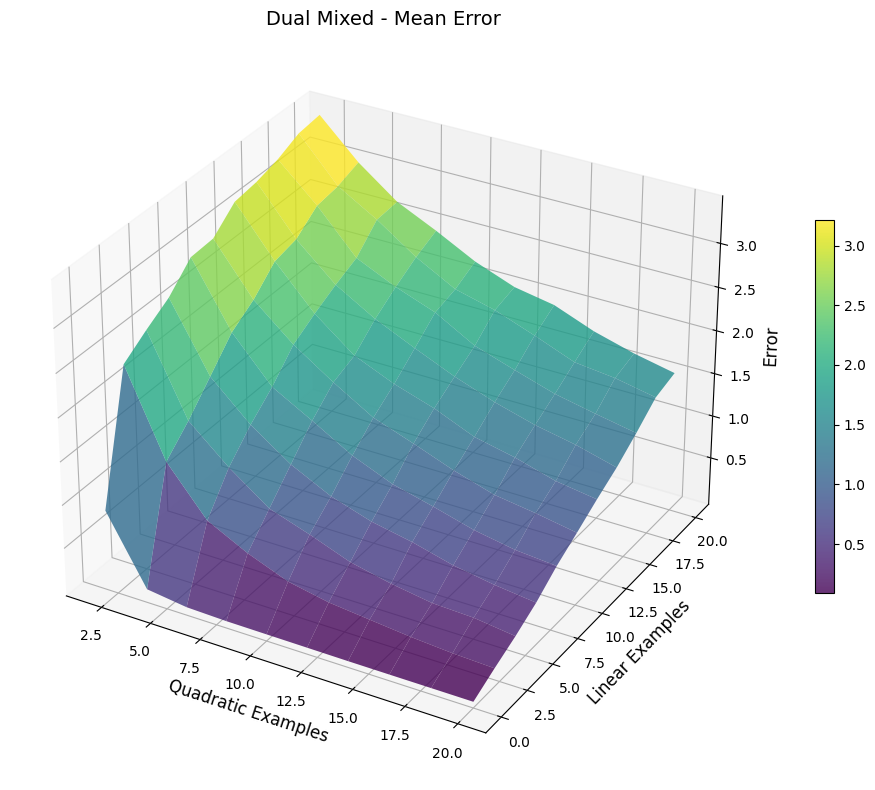

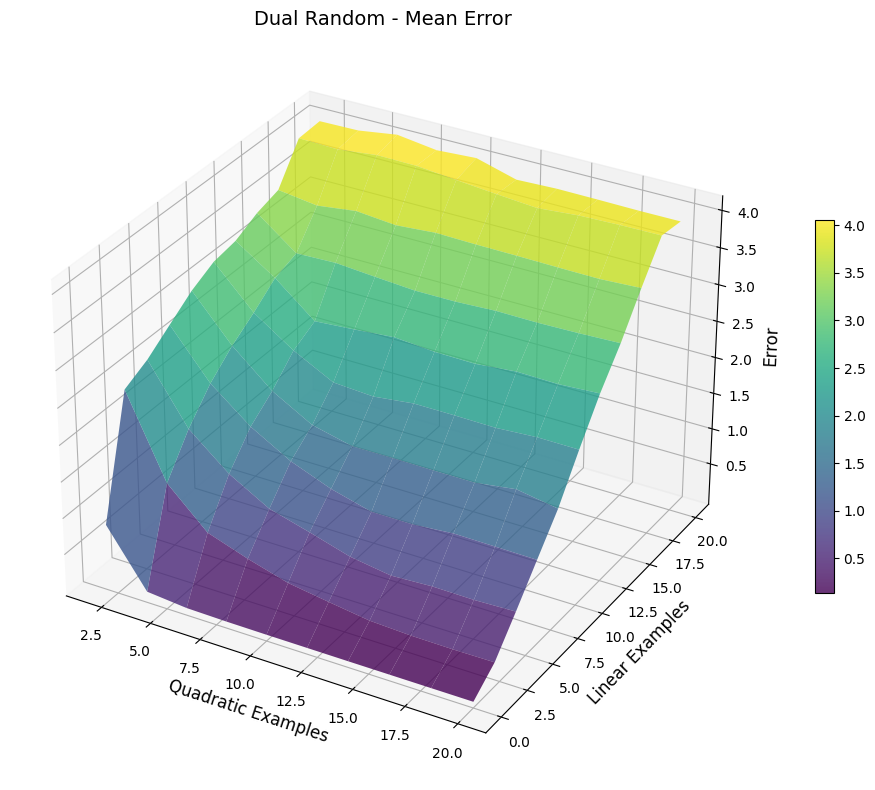

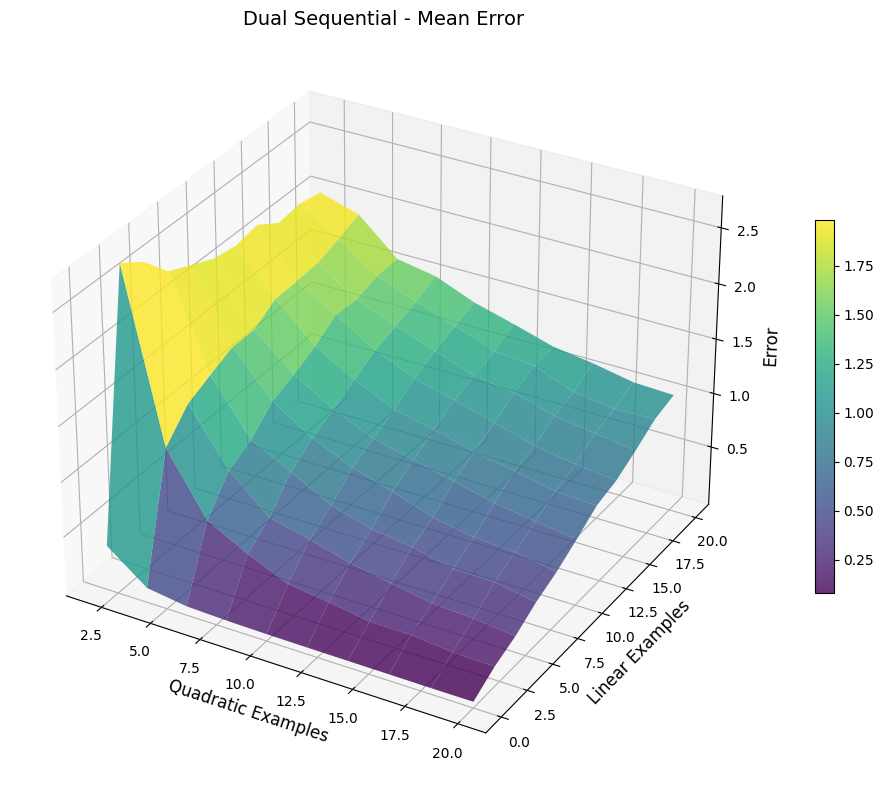

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_3d_surface(df, title='3D Error Surface'):
    """
    Plot a 3D surface where:
    - X axis = quadratic examples (column names)
    - Y axis = linear examples (row index)
    - Z axis = error values
    """
    linear_examples = df.index.values
    quadratic_examples = df.columns.values
    X, Y = np.meshgrid(quadratic_examples, linear_examples)
    Z = df.values

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.85, edgecolor='none')
    ax.set_xlabel('Quadratic Examples (per task)')
    ax.set_ylabel('Linear Examples (per task)')
    ax.set_zlabel('Error')
    ax.set_title(title)
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=20)
    plt.tight_layout()
    plt.show()

for group_title, group in PLOT_GROUPS:
    for dataset in group:
        plot_3d_surface(dataset['mean'], f"{group_title}\n{dataset['label']} – Mean Error Surface")


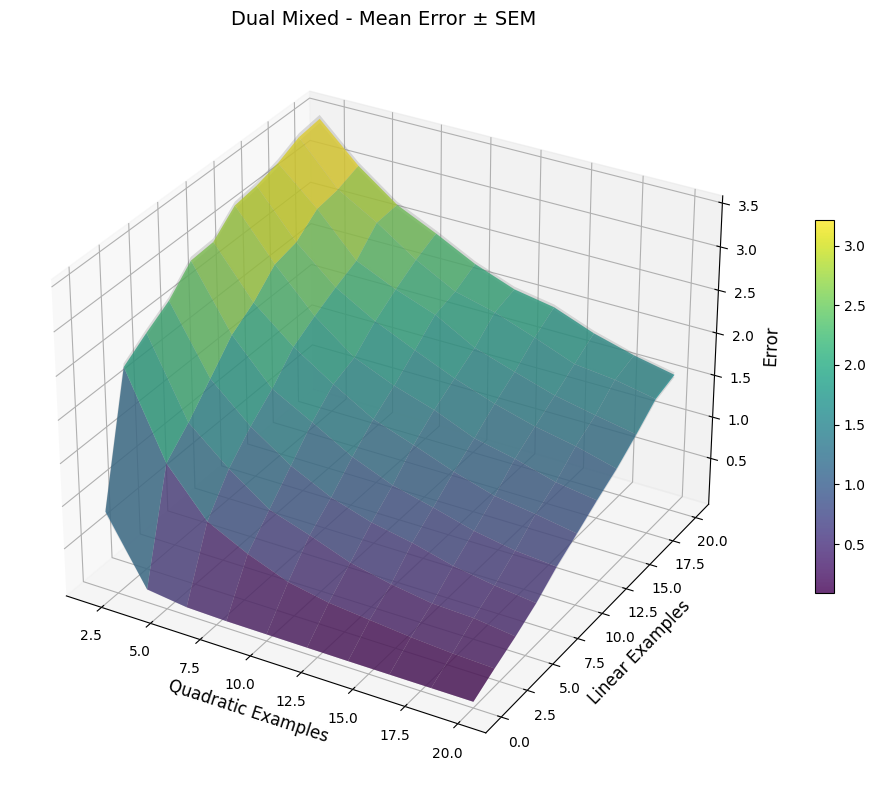

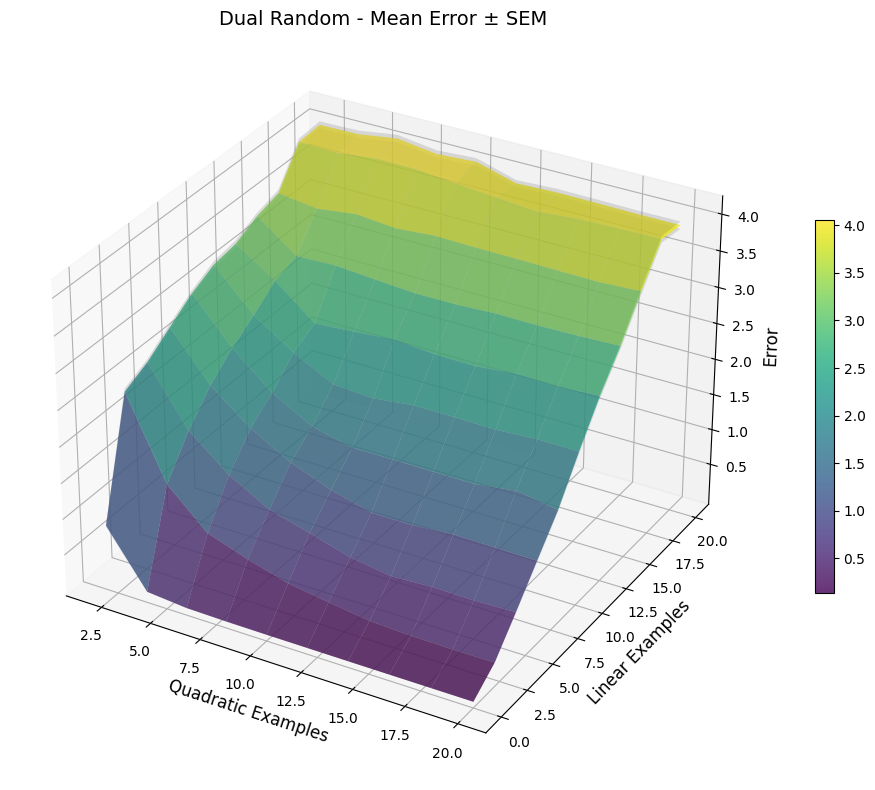

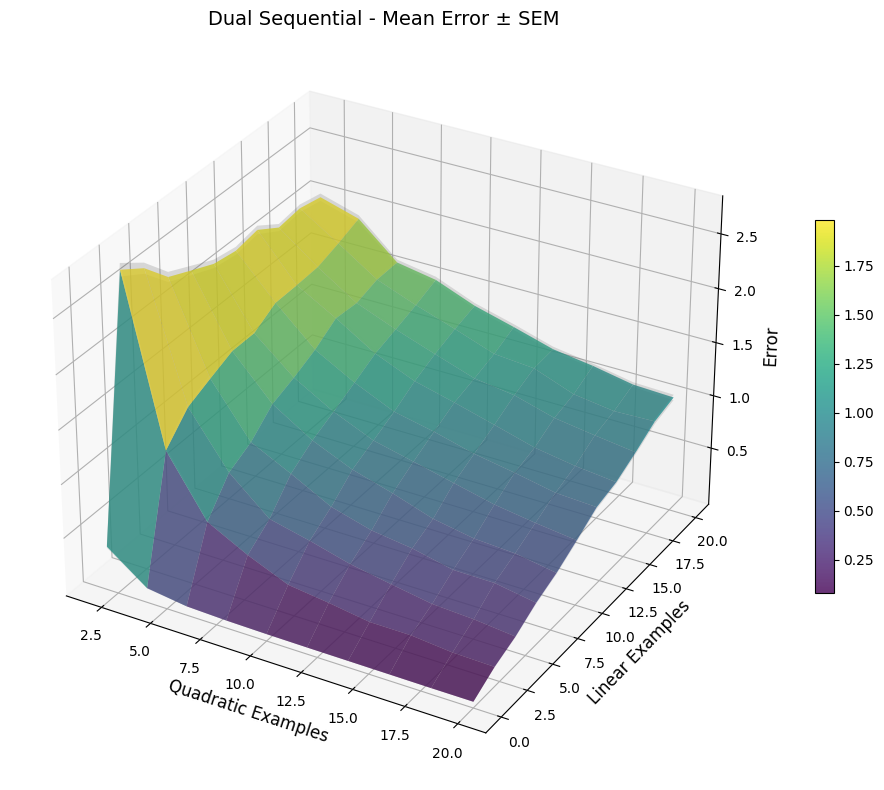

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_3d_surface_with_error(mean_df, sem_df, title='3D Error Surface with Error Bars'):
    """
    Plot a 3D surface with error bars where:
    - X axis = quadratic examples (column names)
    - Y axis = linear examples (row index)
    - Z axis = error values
    - Error surfaces show mean ± SEM
    """
    linear_examples = mean_df.index.values
    quadratic_examples = mean_df.columns.values
    X, Y = np.meshgrid(quadratic_examples, linear_examples)
    Z_mean = mean_df.values
    Z_sem = sem_df.values
    Z_upper = Z_mean + Z_sem
    Z_lower = Z_mean - Z_sem

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X, Y, Z_upper, alpha=0.15, color='gray')
    ax.plot_surface(X, Y, Z_lower, alpha=0.15, color='gray')
    surf = ax.plot_surface(X, Y, Z_mean, cmap='viridis', alpha=0.85, edgecolor='none')
    ax.set_xlabel('Quadratic Examples (per task)')
    ax.set_ylabel('Linear Examples (per task)')
    ax.set_zlabel('Error')
    ax.set_title(title)
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=20)
    plt.tight_layout()
    plt.show()

for group_title, group in PLOT_GROUPS:
    for dataset in group:
        plot_3d_surface_with_error(
            dataset['mean'],
            dataset['sem'],
            f"{group_title}\n{dataset['label']} – Mean Error ± SEM",
        )


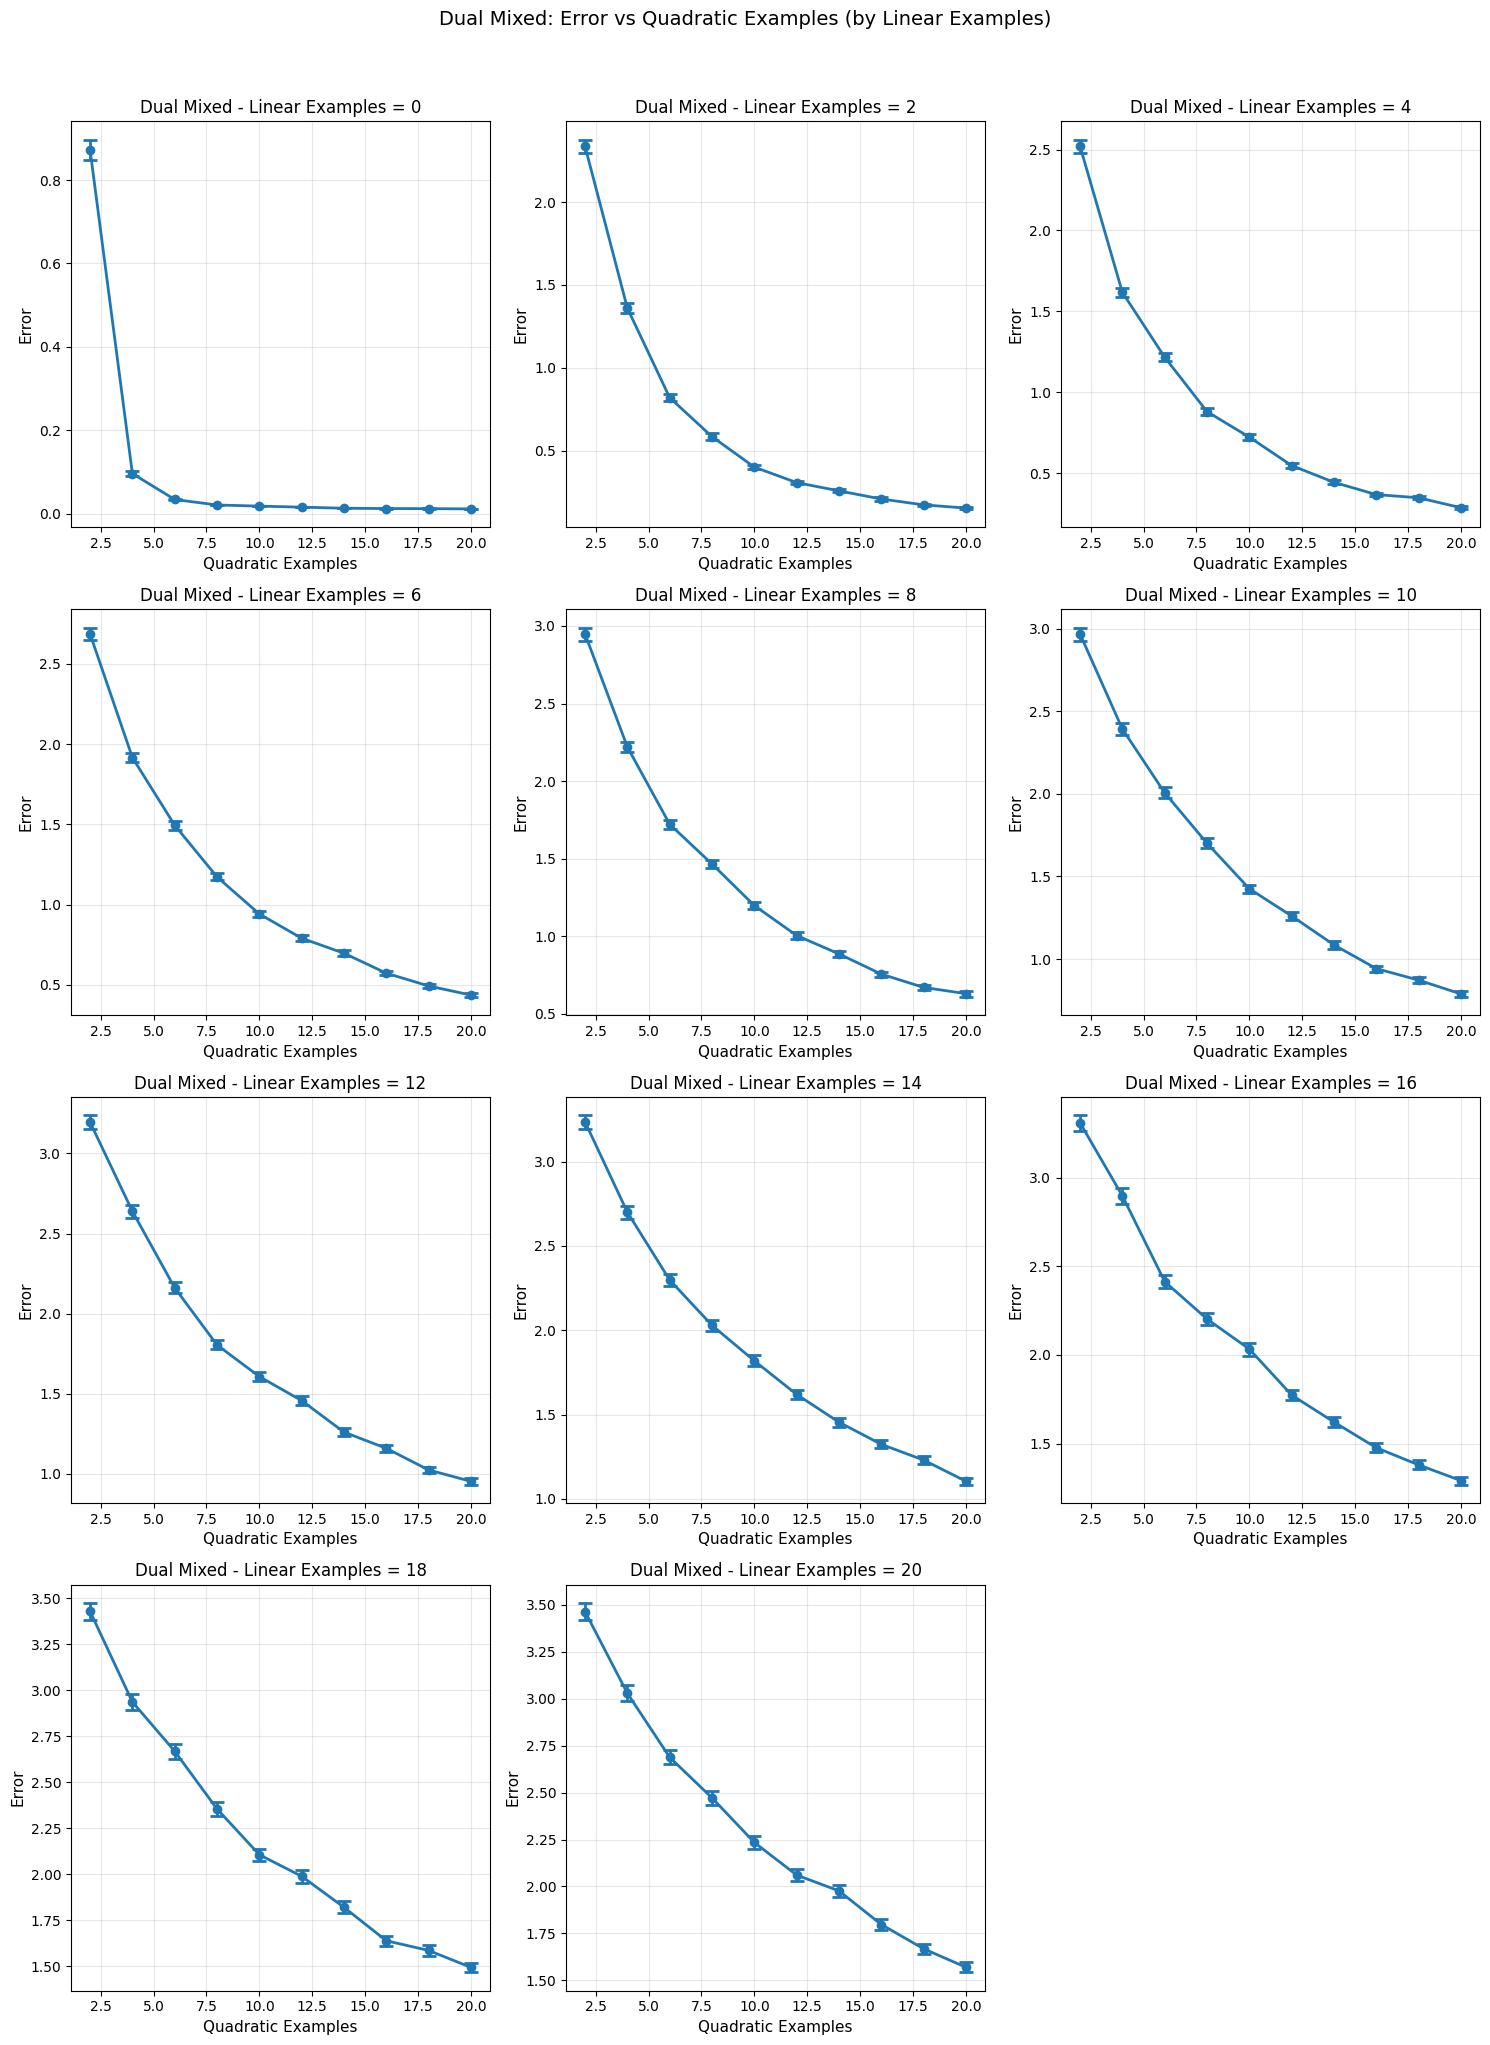

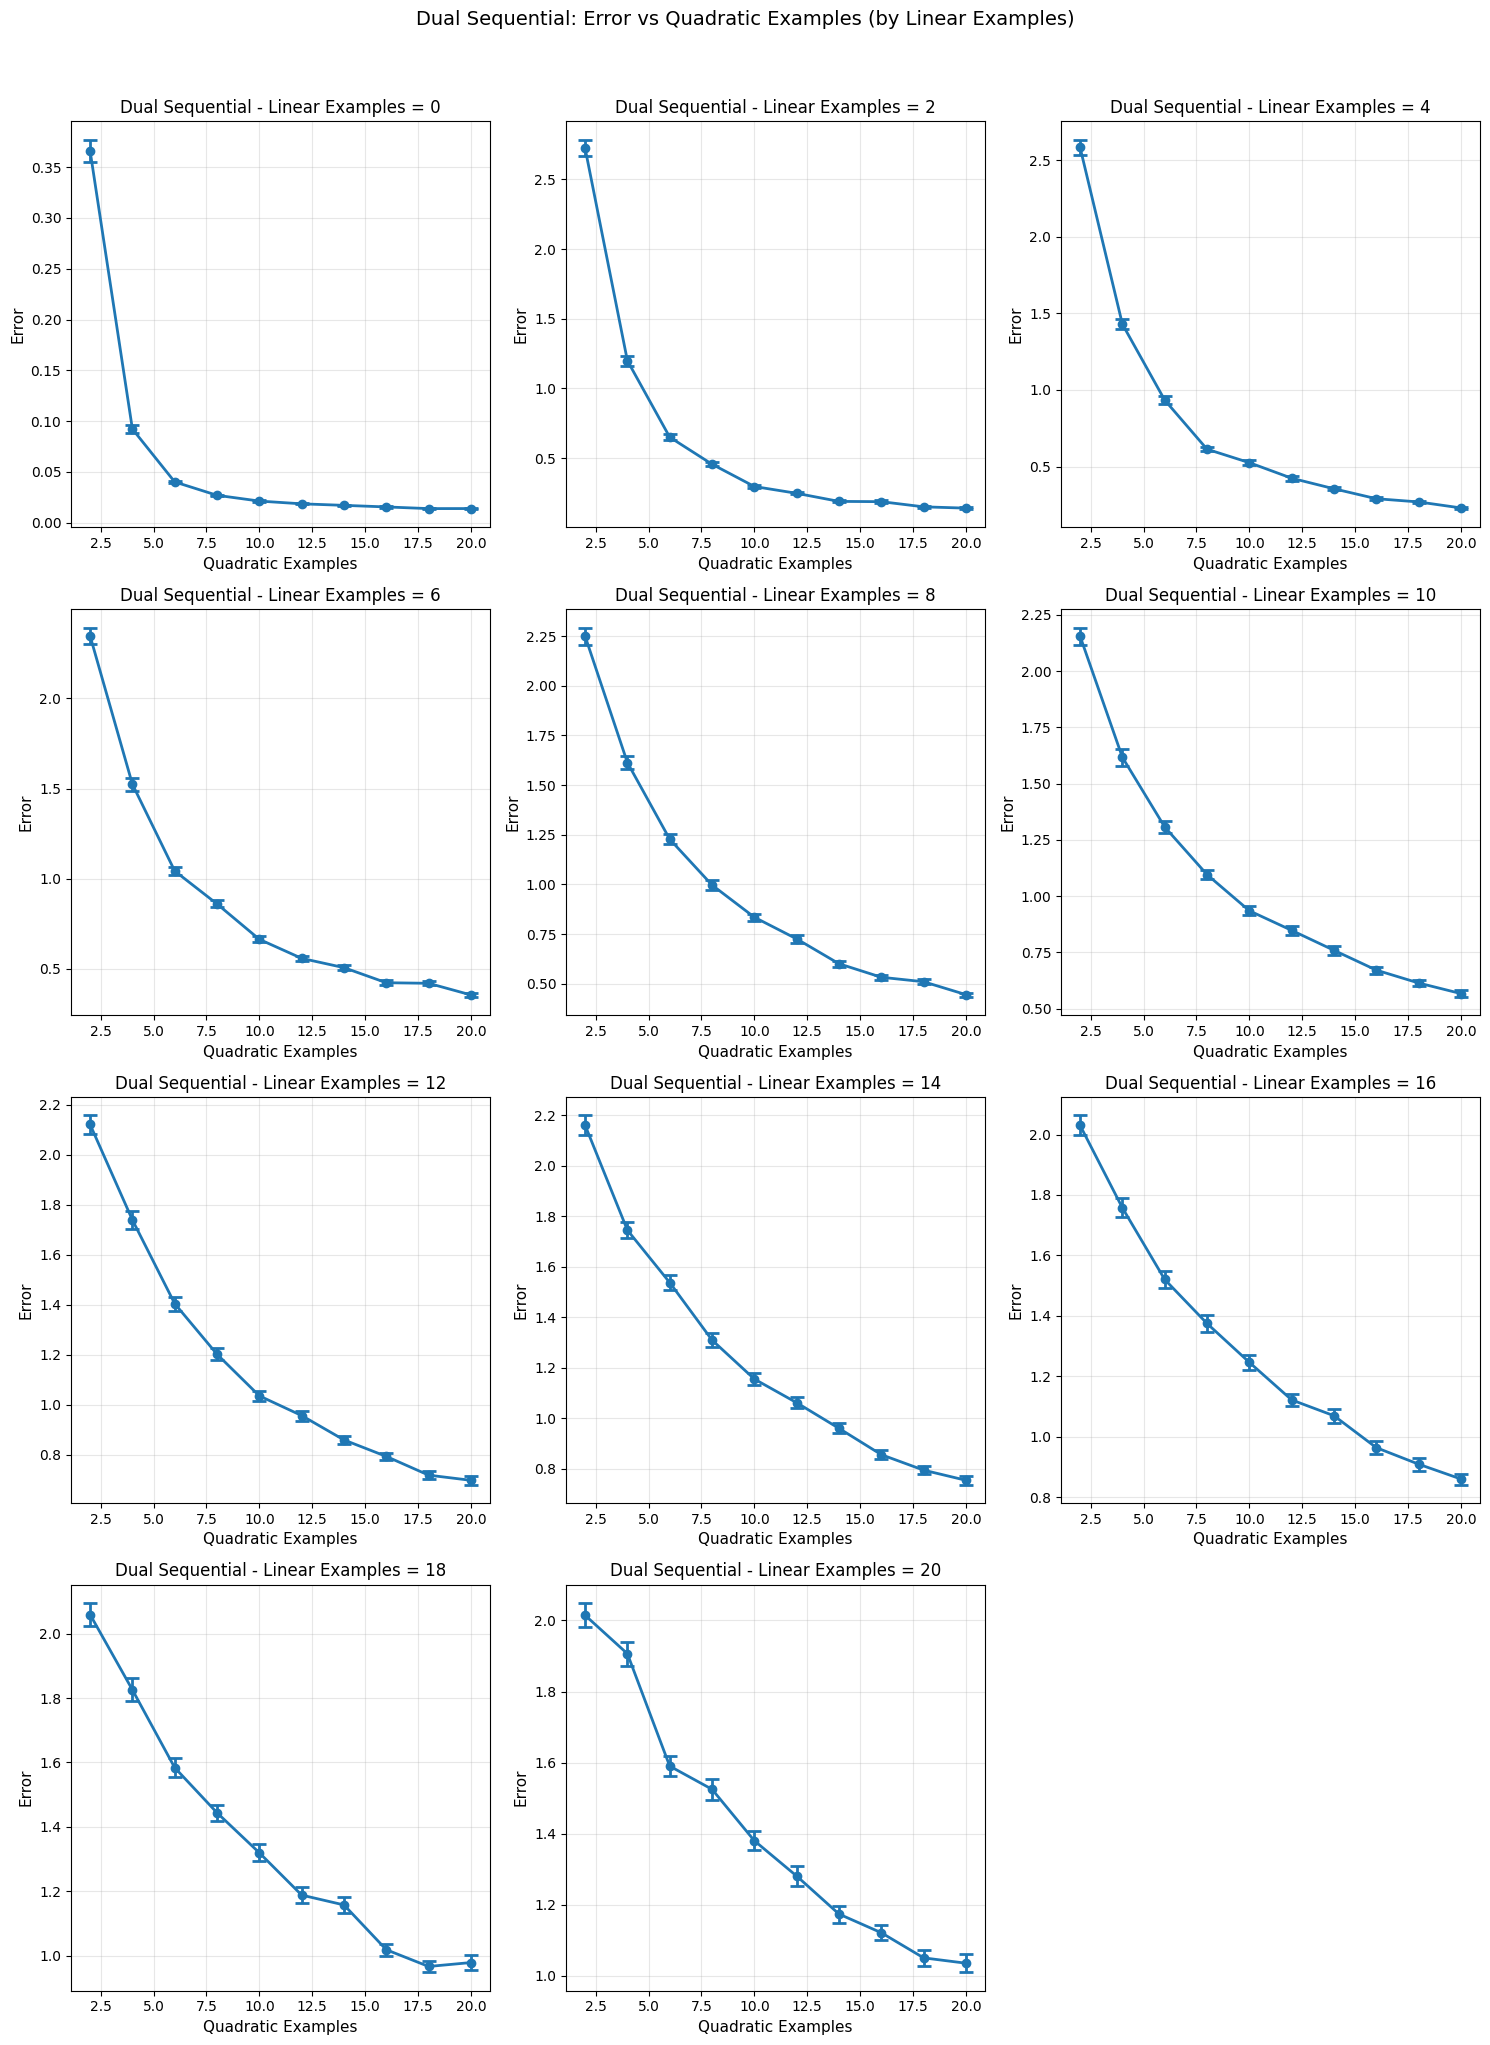

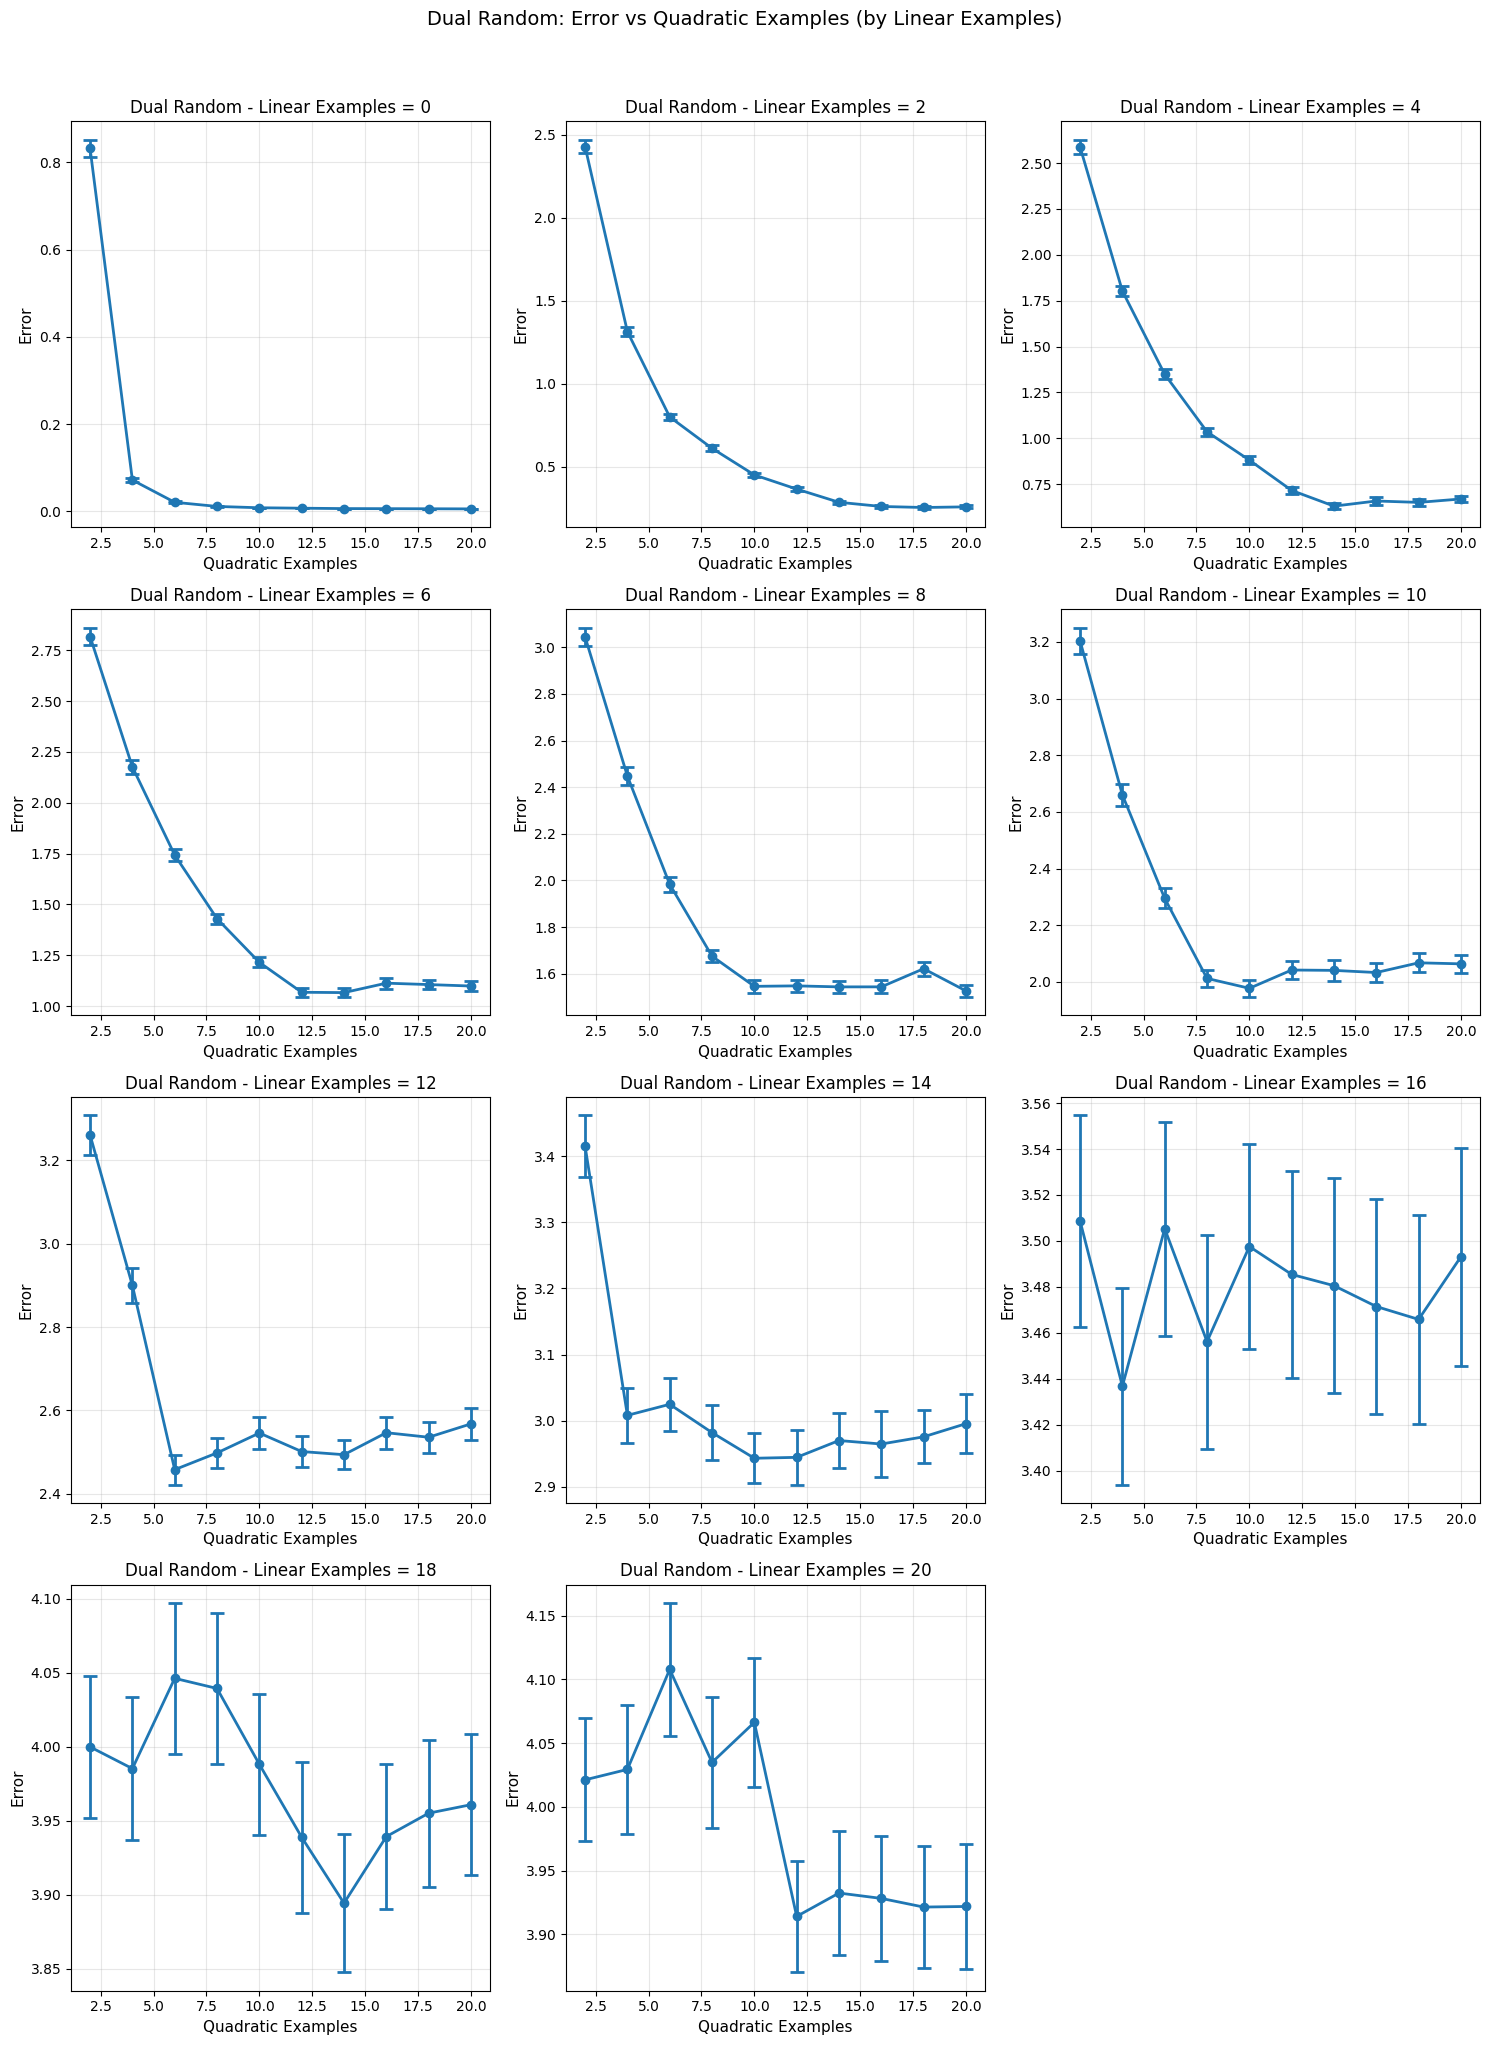

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Plot each dataset separately, grouped by curriculum order
linear_examples = dual_mixed_mean.index.values
quadratic_examples = dual_mixed_mean.columns.values
n_plots = len(linear_examples)

for group_title, group in PLOT_GROUPS:
    for dataset in group:
        dataset_name = dataset['label']
        mean_df = dataset['mean']
        sem_df = dataset['sem']

        n_cols = 3
        n_rows = (n_plots + n_cols - 1) // n_cols
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
        axes = np.array(axes).reshape(-1)

        for idx, n_linear in enumerate(linear_examples):
            ax = axes[idx]
            mean_values = mean_df.loc[n_linear].values
            sem_values = sem_df.loc[n_linear].values
            ax.errorbar(quadratic_examples, mean_values, yerr=sem_values,
                        marker='o', capsize=5, capthick=2, linewidth=2, markersize=6)
            ax.set_xlabel('Quadratic Examples')
            ax.set_ylabel('Error')
            ax.set_title(f"{dataset_name} (Mean Errors)\nLinear Examples = {n_linear}")
            ax.grid(True, alpha=0.3)

        for idx in range(n_plots, len(axes)):
            axes[idx].set_visible(False)

        plt.suptitle(f"{group_title}: {dataset_name}", fontsize=15, y=1.02)
        plt.tight_layout()
        plt.show()


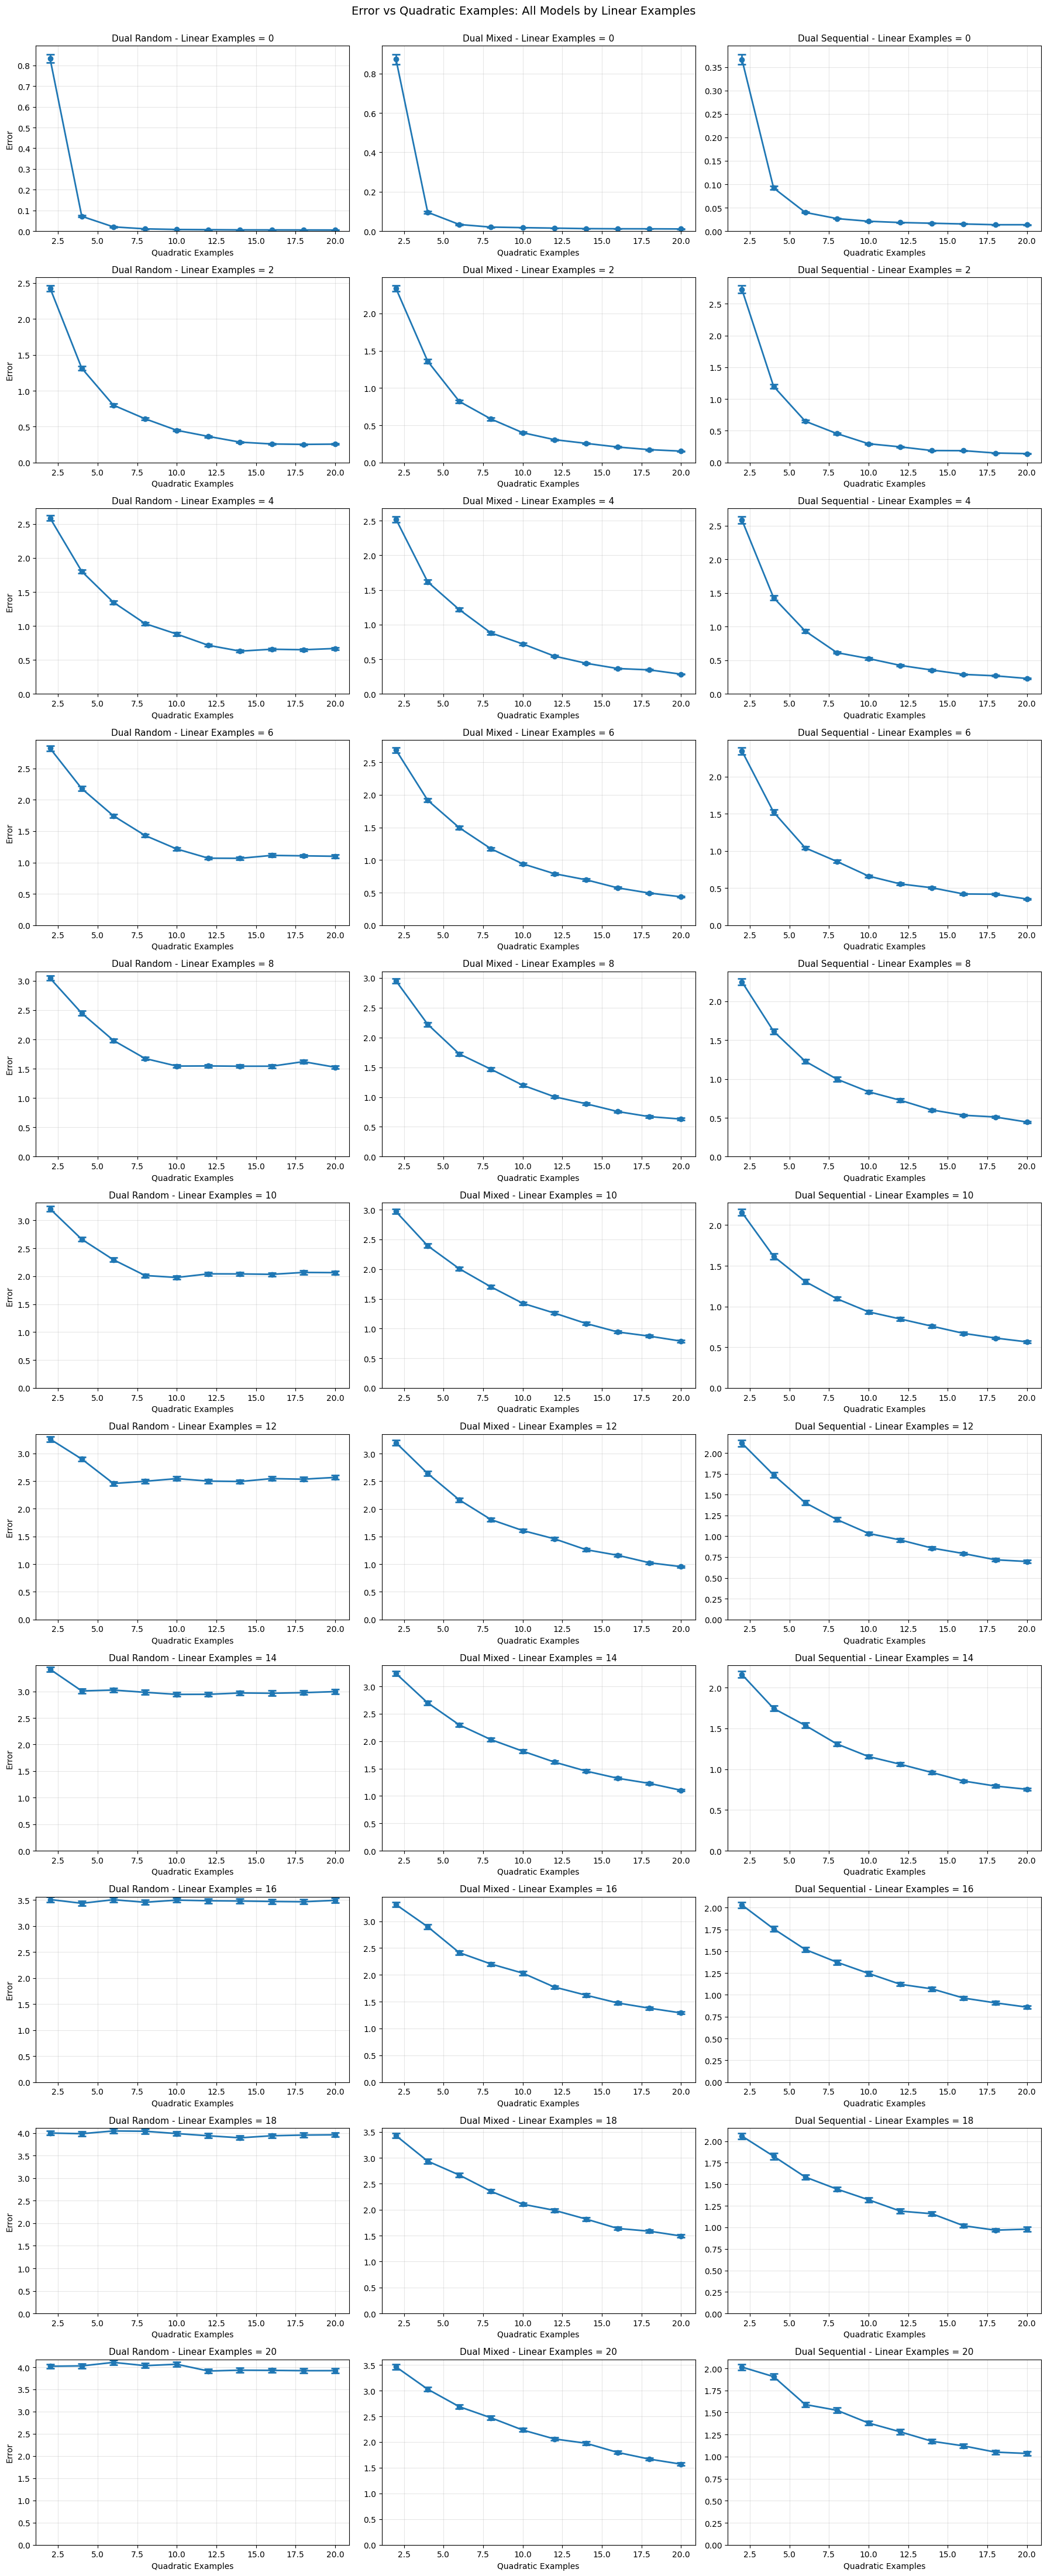

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Grid view: one row per linear example, columns = models (split by curriculum order)
linear_examples = dual_mixed_mean.index.values
quadratic_examples = dual_mixed_mean.columns.values

for group_title, group in PLOT_GROUPS:
    n_rows = len(linear_examples)
    n_cols = len(group)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    axes = np.array(axes)
    if axes.ndim == 1:
        axes = axes.reshape(n_rows, n_cols)

    for row_idx, n_linear in enumerate(linear_examples):
        for col_idx, dataset in enumerate(group):
            ax = axes[row_idx, col_idx]
            mean_values = dataset['mean'].loc[n_linear].values
            sem_values = dataset['sem'].loc[n_linear].values
            ax.errorbar(quadratic_examples, mean_values, yerr=sem_values,
                        marker='o', capsize=5, capthick=2, linewidth=2, markersize=6)
            ax.set_xlabel('Quadratic Examples')
            if col_idx == 0:
                ax.set_ylabel(f'Linear = {n_linear}')
            ax.set_title(f"{dataset['label']} (Mean Errors)")
            ax.grid(True, alpha=0.3)
            ax.set_ylim(bottom=0)

    plt.suptitle(f"Error vs Quadratic Examples: {group_title}", fontsize=15, y=1.01)
    plt.tight_layout()
    plt.show()


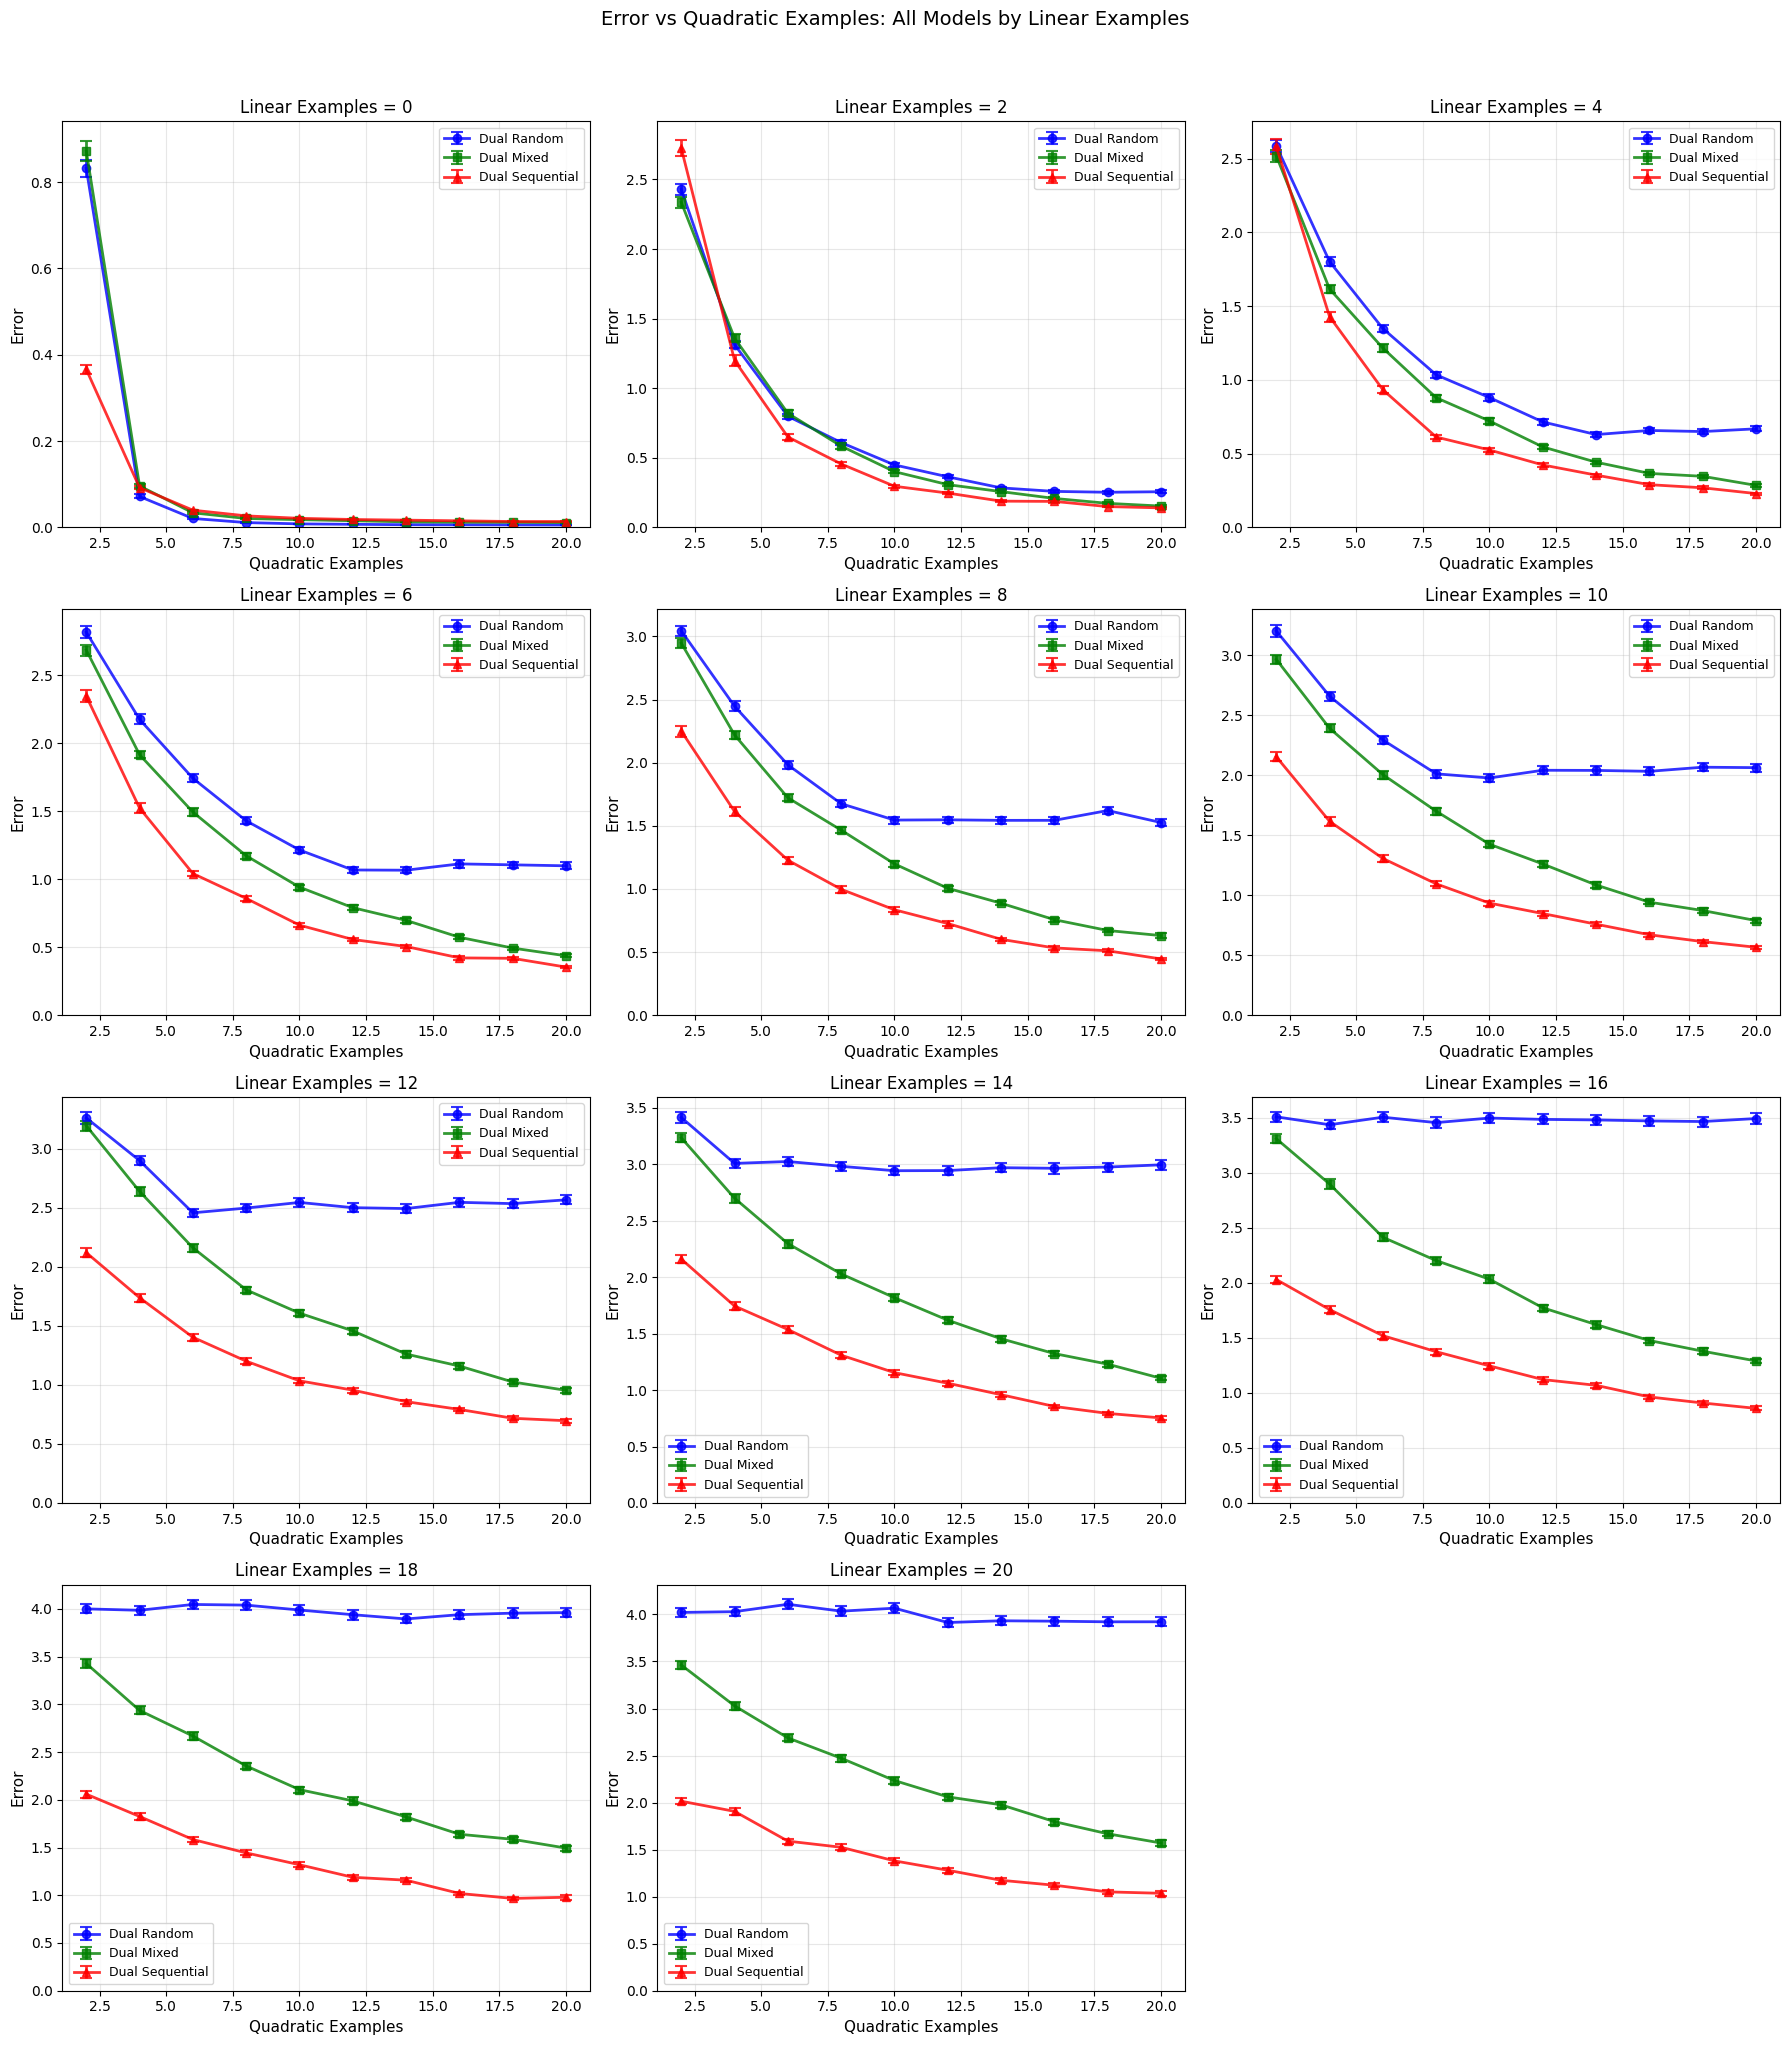

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Combined overlay plots: columns show linear-first, linear-last, and their averaged mean
linear_examples = dual_mixed_mean.index.values
quadratic_examples = dual_mixed_mean.columns.values

fig, axes = plt.subplots(len(linear_examples), len(PLOT_GROUPS), figsize=(6*len(PLOT_GROUPS), 4*len(linear_examples)))
axes = np.array(axes)
if axes.ndim == 1:
    axes = axes.reshape(len(linear_examples), len(PLOT_GROUPS))

model_styles = {
    'Linear-First · Dual Random': {'color': 'navy', 'marker': 'o', 'linestyle': '-'},
    'Linear-First · Dual Mixed': {'color': 'forestgreen', 'marker': 's', 'linestyle': '-'},
    'Linear-First · Dual Sequential': {'color': 'maroon', 'marker': '^', 'linestyle': '-'},
    'Linear-Last · Dual Random': {'color': 'navy', 'marker': 'D', 'linestyle': '--'},
    'Linear-Last · Dual Mixed': {'color': 'forestgreen', 'marker': 'P', 'linestyle': '--'},
    'Linear-Last · Dual Sequential': {'color': 'maroon', 'marker': 'v', 'linestyle': '--'},
    'Mean (Linear-First & Linear-Last) · Dual Random': {'color': 'black', 'marker': '*', 'linestyle': ':'},
    'Mean (Linear-First & Linear-Last) · Dual Mixed': {'color': 'darkslategray', 'marker': 'X', 'linestyle': ':'},
    'Mean (Linear-First & Linear-Last) · Dual Sequential': {'color': 'dimgray', 'marker': 'h', 'linestyle': ':'},
}

for col_idx, (group_title, group) in enumerate(PLOT_GROUPS):
    for row_idx, n_linear in enumerate(linear_examples):
        ax = axes[row_idx, col_idx]
        for dataset in group:
            mean_values = dataset['mean'].loc[n_linear].values
            sem_values = dataset['sem'].loc[n_linear].values
            style = model_styles[dataset['label']]
            ax.errorbar(
                quadratic_examples,
                mean_values,
                yerr=sem_values,
                marker=style['marker'],
                capsize=4,
                capthick=1.5,
                linewidth=2,
                markersize=6,
                label=dataset['label'],
                color=style['color'],
                alpha=0.85,
                linestyle=style['linestyle'],
            )
        ax.set_xlabel('Quadratic Examples')
        if col_idx == 0:
            ax.set_ylabel(f'Linear Examples = {n_linear}')
        ax.set_title(group_title)
        ax.grid(True, alpha=0.3)
        ax.set_ylim(bottom=0)
        if row_idx == 0:
            ax.legend(fontsize=8)

plt.suptitle('Combined Error vs Quadratic Examples\nLinear-First vs Linear-Last vs Mean-of-Both Curricula', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()
